## Análise dos dados

A fonte de dados para o desenvolvimento desse projeto são dois arquivos csv, cada um contendo a lista de produções presentes para uma plataforma de streming. 
Um arquivo com os dados da Netflix e outro arquivo com os dados da Amazon Prime Video.

In [1]:
# Importando bibliotecas que vão ser utilizadas
import pandas as pd
import numpy as np
from uuid import uuid4
import seaborn as sns
import matplotlib.pyplot as plt

# Configurando o estilo dos gráficos
plt.style.use('ggplot')

### Unificando as bases de dados

In [2]:
# Importando os dados
netflix_titles = pd.read_csv("data/netflix_titles.csv")
amazon_titles = pd.read_csv("data/amazon_prime_titles.csv")

In [3]:
# Criando id único para cada registro
def add_to_unique_data_set(dataframe):
    for index in dataframe.index:
        dataframe.loc[index, 'id'] = str(uuid4())

add_to_unique_data_set(netflix_titles)
add_to_unique_data_set(amazon_titles)

In [4]:
# Criando coluna para identificar a plataforma de origem
netflix_titles['platform'] = 'Netflix'
amazon_titles['platform'] = 'Amazon Prime'

In [5]:
# Unindo as bases de dados e resetando o index do novo dataframe
titles = pd.concat([netflix_titles, amazon_titles], ignore_index=True)

### Entendendo os dados

In [6]:
# Configurando para exibir todas as colunas do dataframe
pd.set_option('display.max_columns', None)

In [7]:
print(f"Número de linhas do dataframe: {titles.shape[0]}")
print(f"Número de colunas do dataframe: {titles.shape[1]}")


Número de linhas do dataframe: 18475
Número de colunas do dataframe: 14


In [8]:
# Visualizando os tipos de dados
titles.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,id,platform
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2c7f504d-ed28-4b58-b459-ec6f68fc9e85,Netflix
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",450723d3-6e5f-44d5-9d33-af6df8054224,Netflix
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,29745983-987c-4964-a2c6-c1e8782f4b25,Netflix


In [9]:
# Número de linhas para cada variável
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18475 entries, 0 to 18474
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       18475 non-null  object
 1   type          18475 non-null  object
 2   title         18475 non-null  object
 3   director      13759 non-null  object
 4   cast          16417 non-null  object
 5   country       8648 non-null   object
 6   date_added    8952 non-null   object
 7   release_year  18475 non-null  int64 
 8   rating        18134 non-null  object
 9   duration      18472 non-null  object
 10  listed_in     18475 non-null  object
 11  description   18475 non-null  object
 12  id            18475 non-null  object
 13  platform      18475 non-null  object
dtypes: int64(1), object(13)
memory usage: 2.0+ MB


In [10]:
# Número de vaviáveis NaN
titles.isna().sum()

show_id            0
type               0
title              0
director        4716
cast            2058
country         9827
date_added      9523
release_year       0
rating           341
duration           3
listed_in          0
description        0
id                 0
platform           0
dtype: int64

A primeira impressão é de que os dados parecem estar bem organizados, no entanto existem diversos valores faltantes. Cada variável contém um percentual distinto de dados nulos, e como o objetivo desse projeto é analisar esses dados de forma particular para cada variável, a decisão tomada foi manter todos os registros da base, desconsiderando os dados faltantes pertinentes a cada ocasião. Isso será possível, pois utilizaremos funções que ignoram NaNs automaticamente. No entanto, é importante salientar que por esse motivo as respostas obtidas podem apresentar distorções quanto a realidade, caso pudessemos realizar a análise sobre uma base de dados sem valores faltantes.

In [11]:
# Entendendo melhor a variável que vai ser utilizada para responder as perguntas sobre atores/atrizes
titles.cast.value_counts()

Maggie Binkley                                                                                                                56
1                                                                                                                             34
Anne-Marie Newland                                                                                                            24
David Attenborough                                                                                                            21
Cassandra Peterson                                                                                                            21
                                                                                                                              ..
Gijs Scholten van Aschat, Jacob Derwig, Rifka Lodeizen, Juda Goslinga, Zeb Troostwijk, Elisabeth Hesemans, Joosje Duk          1
Stephen Graham, Conleth Hill, Lara Pulver, Arsher Ali, Stuart Graham, Ian McElhinney             

In [12]:
# Entendendo melhor a variável que vai ser utilizada para responder as perguntas sobre países produtores de conteúdo
titles.country.value_counts()

United States                                3071
India                                        1201
United Kingdom                                447
Japan                                         247
South Korea                                   199
                                             ... 
United Kingdom, Hong Kong                       1
Brazil, United States                           1
Denmark, Brazil, France, Portugal, Sweden       1
India, Turkey                                   1
Italy, Spain                                    1
Name: country, Length: 783, dtype: int64

In [13]:
# Entendendo melhor a variável que vai ser utilizada para responder as perguntas sobre mês com mais adições de filmes
titles.date_added.value_counts()

January 1, 2020       109
November 1, 2019       89
March 1, 2018          75
December 31, 2019      74
October 1, 2018        71
                     ... 
October 2, 2015         1
October 1, 2015         1
September 18, 2015      1
September 15, 2015      1
March 14, 2021          1
Name: date_added, Length: 1785, dtype: int64

In [14]:
# Entendendo melhor a variável que vai ser utilizada para responder as perguntas sobre gênero dos filmes
titles.listed_in.value_counts()

Drama                                               986
Comedy                                              536
Drama, Suspense                                     399
Comedy, Drama                                       377
Dramas, International Movies                        362
                                                   ... 
Dramas, Faith & Spirituality, Sports Movies           1
Children & Family Movies, Classic Movies, Dramas      1
Classic Movies, Horror Movies, Thrillers              1
Action & Adventure, Comedies, Music & Musicals        1
Anime, Comedy, Drama                                  1
Name: listed_in, Length: 1031, dtype: int64

In [15]:
# Entendendo melhor a variável que vai ser utilizada para responder as perguntas que envolve a diferença dos tipos de produção
titles.type.value_counts()

Movie      13945
TV Show     4530
Name: type, dtype: int64

Com base na observação dos dados presentes para essas variáveis, pode ser identificado a necessiadade de alguns tratamentos para os dados. Sendo eles:
- A conversão para datetime da coluna "date_added";
- A devida formatação em listas para os dados das colunas "cast", "country" e "listed_in", visando possbilitar transformações de agrupamento para os valores contidos nessas variáveis;
- Uma higienização para dados faltantes na coluna "cast", mas que estão preenchidos com outros valores;
- Uma higienização para dados de gênero presentes na coluna "listed_in".

### Tratando os dados

In [16]:
# Convertendo a coluna de datas para datetime
titles.date_added = pd.to_datetime(titles.date_added)

In [17]:
# Criando a coluna month_added para possbilitar análises a partir apenas do mês
titles['month_added'] = titles.date_added.dt.month_name()

In [18]:
## Criando funções para serem utilizadas no tratamento dos dados

# Criando uma função para formatar corretamente os dados necessários em listas

def fomarting_lists_from_columns(dataframe, column_name):

    for index in dataframe.index:
        if str(dataframe.loc[index,column_name]) != 'nan':
            string_list = dataframe.loc[index, column_name]
            converted_list = string_list.split(',')
            treated_list = [[s.strip()] for s in converted_list]

            dataframe.loc[index,  f'treated_{column_name}'] = treated_list

# Criando função para higienizar dados nas colunas através de um dicionário

def replace_values(dataframe, column_name, replacement_dict):
    dataframe[column_name] = dataframe[column_name].replace(replacement_dict, regex=True)
    return dataframe

In [19]:
# Criando dicionário para tratar os dados de categorias e possbilitar a divisão correta das categorias
listed_in_replacement_dict = {'Action & Adventure': 'Action, Adventure',
                            'Sci-Fi & Fantasy': 'Sci-Fi, Fantasy',
                            'Classic & Cult TV': 'Classic, Cult TV'}
                    

# Aplicando a função de higienização para tratar os dados de categorias e possbilitar a divisão correta das categorias
titles = replace_values(titles, 'listed_in', listed_in_replacement_dict)

In [20]:
# Higienização dos dados faltantes na coluna "cast" representados com outros valores
titles.cast.replace('1', np.NaN, inplace=True)

In [21]:
# Aplicando a função para formatar corretamente os dados necessários em listas
fomarting_lists_from_columns(titles, 'cast')
fomarting_lists_from_columns(titles, 'country')
fomarting_lists_from_columns(titles, 'listed_in')

In [22]:
## Criando dataframe auxiliar, transformando a coluna de listas em uma coluna com cada item da lista em uma nova linha
# para a coluna cast
df_cast = titles.explode('treated_cast')

# para a coluna country
df_country = titles.explode('treated_country')

# para a coluna listed_in
df_listed_in = titles.explode('treated_listed_in')

In [23]:
# Criando dicionário para higienizar os dados dos países
country_replacement_dict = {'': np.nan}
                    

# Aplicando a função de higienização para a coluna de países
df_country = replace_values(df_country, 'treated_country', country_replacement_dict)

In [24]:
# Criando dicionário para higienizar os dados dos gêneros de filmes
genre_replacement_dict = {'Comedies': 'Comedy', 
                            'Documentaries': 'Documentary',
                            'TV ': '',
                            ' TV': '',
                            'Movies ': '',
                            ' Movies': '',
                            'Shows ': '',
                            ' Shows': '',
                            '&': 'and',
                            'and Culture': 'Culture',
                            'Dramas': 'Drama',
                            "Kids'": 'Kids',
                            'Anime Features': 'Anime',
                            'Anime Series': 'Anime',
                            'Romantic': 'Romance',
                            'Science Fiction': 'Sci-Fi' }

# Aplicando a função de higienização para as coluna de categorias
df_listed_in = replace_values(df_listed_in, 'treated_listed_in', genre_replacement_dict)

Para a criação de cada replacement_dict foi realizado um processo iterativo de execução da função e análise dos valores unicos obtidos como resultado, usando o código:<BR>
<BR>
`dataframe.treated_column_name.value_counts().sort_index()`<BR>
<BR>
Na etapa da criação do replacement_dict para os gêneros de filmes, foi decidido manter a estrutura dos gêneros o mais fiel possível aos dados presentes antes da higienização, sem fazer grandes alterações para agrupar os dados em gêneros mais amplos. Um exemplo dessa situação foi a escolha em manter os gêneros "Comedy" e "Stand-Up Comedy" ao invés de atribuir esses dois gêneros unicamente à "Comedy".

### Filtrando os dados

#### 1- Top 10 atores/atrizes considerando todos os dados;

In [25]:
# Conferindo a relevância dos dados faltantes dentro do subconjundo a ser analisado
subset = titles.shape[0]
subset_missing_values = titles.loc[titles.cast.isna()].shape[0]

print("{} linhas com valores faltantes, o equivalente a {:.2f}% do subconjunto de dados a ser analisado pelo atributo 'cast'.".format(subset_missing_values, (subset_missing_values/subset)*100))

2092 linhas com valores faltantes, o equivalente a 11.32% do subconjunto de dados a ser analisado pelo atributo 'cast'.


In [26]:
# Agrupando os atores e contabilizando suas participações em produções
df_top_ten_actors = pd.DataFrame(df_cast.treated_cast.value_counts().reset_index().rename(columns={'index': 'actor_name', 'treated_cast': 'count'}))

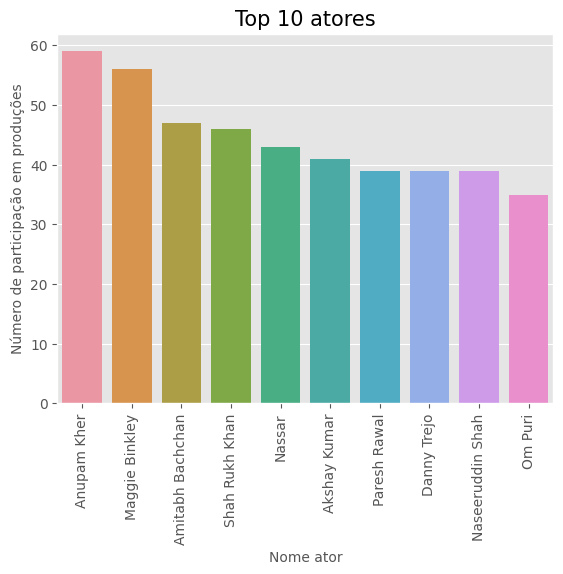

In [27]:
# Criando gráfico rankeando os 10 atores que participam de mais produções
chart_top_ten_actors = sns.barplot(data=df_top_ten_actors.head(10), x='actor_name', y='count')
plt.xticks(rotation=90)
chart_top_ten_actors.set_title('Top 10 atores', fontsize = 15)
chart_top_ten_actors.set_ylabel('Número de participação em produções', fontsize = 10)
chart_top_ten_actors.set_xlabel('Nome ator',fontsize=10)
plt.show(chart_top_ten_actors)


#### 2- Top 5 países produtores de conteúdos considerando todos os dados e comparando as duas plataformas;

In [28]:
# Conferindo a relevância dos dados faltantes dentro do subconjundo a ser analisado
subset = titles.shape[0]
subset_missing_values = titles.loc[titles.treated_country.isna()].shape[0]

print("{} linhas com valores faltante, o equivalente a {:.2f}% da base de dados a ser analisado pelo atribuito 'country' em relação a base completa.".format(subset_missing_values, (subset_missing_values/subset)*100))

9827 linhas com valores faltante, o equivalente a 53.19% da base de dados a ser analisado pelo atribuito 'country' em relação a base completa.


In [29]:
# Agrupando os países e contabilizando o número de produções
df_top_five_country= pd.DataFrame(df_country[['treated_country']].value_counts().reset_index().rename(columns={'treated_country': 'country', 0:'count'}))

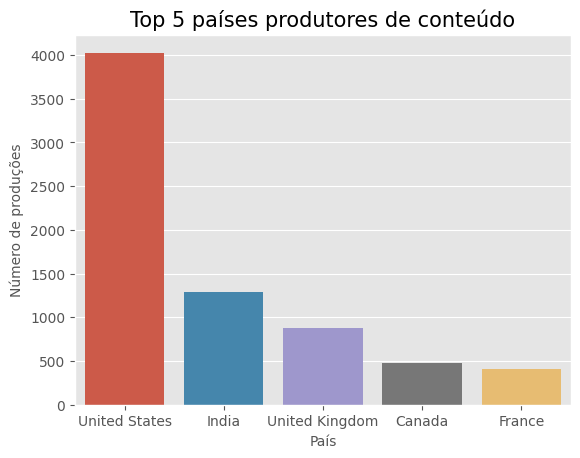

In [30]:
# Criando gráfico rankeando os 5 países com mais produção de conteúdo
chart_top_five_country = sns.barplot(data=df_top_five_country.head(5), x='country', y='count')
chart_top_five_country.set_title('Top 5 países produtores de conteúdo', fontsize = 15)
chart_top_five_country.set_ylabel('Número de produções', fontsize = 10)
chart_top_five_country.set_xlabel('País',fontsize=10)
plt.show(chart_top_five_country)


In [31]:
# Conferindo a relevância dos dados faltantes dentro do subconjundo a ser analisado
subset_netflix = titles.loc[(titles.platform == 'Netflix')].shape[0]
subset_netflix_missing_values = titles.loc[(titles.platform == 'Netflix') & (titles.treated_country.isna())].shape[0]

print("{} linhas com valores faltantes, o equivalente a {:.2f}% da base de dados a ser analisado pelo atribuito 'country' em relação a base da netflix.".format(subset_netflix_missing_values, (subset_netflix_missing_values/subset_netflix)*100))

subset_amazon = titles.loc[(titles.platform == 'Amazon Prime')].shape[0]
subset_amazon_missing_values = titles.loc[(titles.platform == 'Amazon Prime') & (titles.treated_country.isna())].shape[0]

print("{} linhas com valores faltantes, o equivalente a {:.2f}% da base de dados a ser analisado pelo atribuito 'country' em relação a base da amazon prime.".format(subset_amazon_missing_values, (subset_amazon_missing_values/subset_amazon)*100))

831 linhas com valores faltantes, o equivalente a 9.44% da base de dados a ser analisado pelo atribuito 'country' em relação a base da netflix.
8996 linhas com valores faltantes, o equivalente a 93.05% da base de dados a ser analisado pelo atribuito 'country' em relação a base da amazon prime.


In [32]:
# Agrupando os países e contabilizando o número de produções por plataforma
df_top_five_country_by_platform= pd.DataFrame(df_country[['platform', 'treated_country']].value_counts().reset_index().rename(columns={'treated_country': 'country', 0:'count'}))

In [33]:
# Agrupando os países e contabilizando e rankeando os 5 países com maior com maior produção de conteúdo para cada plataforma
df_top_five_country_netflix = df_top_five_country_by_platform[df_top_five_country_by_platform['platform'] == 'Netflix'].head(5)
df_top_five_country_amazon= df_top_five_country_by_platform[df_top_five_country_by_platform['platform'] == 'Amazon Prime'].head(5)

# Unificando os dados de top 5 países por plataforma
df_top_five_platforms = pd.concat([df_top_five_country_netflix, df_top_five_country_amazon])

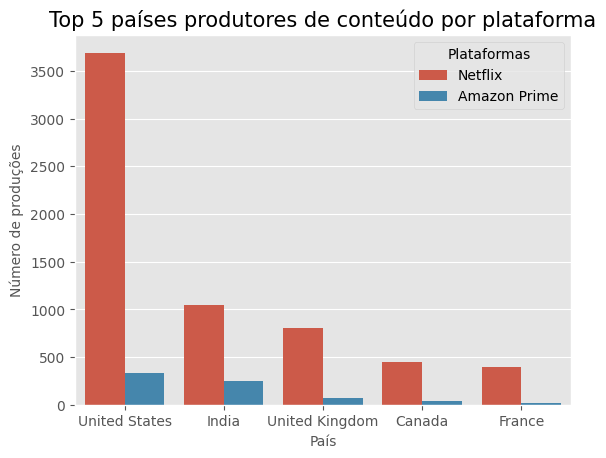

In [34]:
# Criando gráfico rankeando os 5 países com mais produção de conteúdo por platforma
chart_top_five_country_platforms = sns.barplot(data=df_top_five_platforms, x='country', y='count', hue='platform')
chart_top_five_country_platforms.set_title('Top 5 países produtores de conteúdo por plataforma', fontsize = 15)
chart_top_five_country_platforms.legend(title='Plataformas')
chart_top_five_country_platforms.set_ylabel('Número de produções', fontsize = 10)
chart_top_five_country_platforms.set_xlabel('País',fontsize=10)
plt.show(chart_top_five_country_platforms)



#### 3- Mês no qual há mais adições de filmes na plataforma Netflix;

In [35]:
# Conferindo a relevância das datas faltantes dentro do subconjundo a ser analisado
subset = titles.loc[(titles.platform == 'Netflix')].shape[0]
subset_missing_values = titles.loc[(titles.platform == 'Netflix') & (titles.date_added.isna())].shape[0]

print("{} linhas com valores faltantes, o equivalente a {:.2f}% do subconjunto de dados a ser analisado pela data de adição na plataforma netflix.".format(subset_missing_values, (subset_missing_values/subset)*100))

10 linhas com valores faltantes, o equivalente a 0.11% do subconjunto de dados a ser analisado pela data de adição na plataforma netflix.


In [36]:
# Calculando o mês com maior número de filmes adicionados na plataforma Netflix
most_added_month = titles.month_added.loc[(titles.platform == 'Netflix') & (titles.type == 'Movie')].value_counts().idxmax()

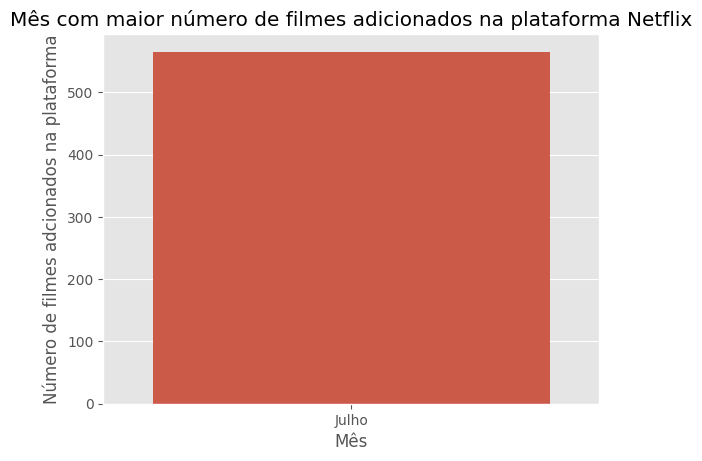

In [51]:
most_netflix_added_month = sns.countplot(data=titles.loc[(titles.platform == 'Netflix') & (titles.type == 'Movie') & (titles.month_added == most_added_month)], x='month_added')
most_netflix_added_month.set(xlabel='Mês', 
                             ylabel='Número de filmes adcionados na plataforma', 
                             title='Mês com maior número de filmes adicionados na plataforma Netflix',
                             xticklabels=(['Julho']))

plt.show(most_netflix_added_month)

#### 4- Quantidade de filmes listados como comédia.

In [38]:
# Contabilizando os filmes listados em categorias de comédia
df_count_movies_in_comedy = df_listed_in[['type','treated_listed_in']].loc[(df_listed_in.type == 'Movie')].groupby('treated_listed_in').count().query("treated_listed_in in ('Comedy', 'Stand-Up Comedy')").reset_index()

total_movies_in_comedy = df_count_movies_in_comedy.type.sum()

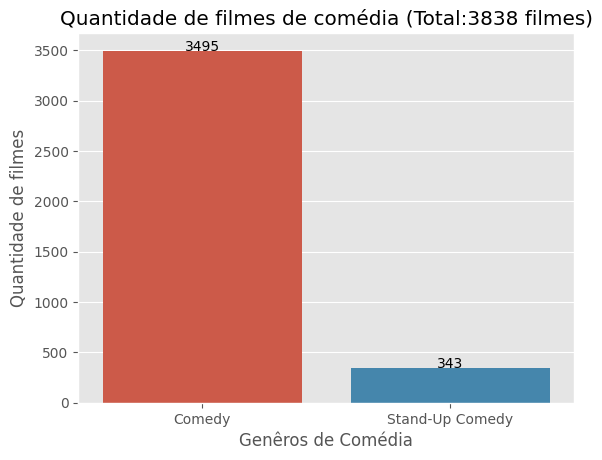

In [39]:
chart_total_movies_in_comedy = sns.barplot(x='treated_listed_in', y='type', data=df_count_movies_in_comedy)
chart_total_movies_in_comedy.set(xlabel='gêneros de Comédia', 
                                 ylabel='Quantidade de filmes', 
                                 title=f'Quantidade de filmes de comédia (Total:{total_movies_in_comedy} filmes)')

# Adicionando os valores de contagem acima de cada barra
for index, row in df_count_movies_in_comedy.iterrows():
    chart_total_movies_in_comedy.annotate(row['type'], xy=(index, row['type']), ha='center', fontsize=10)

plt.show(chart_total_movies_in_comedy)

#### 5- Lista de todos os gêneros de filmes.

In [40]:
# Criando um DataFrame com a contagem de filmes por gênero
df_movie_count = df_listed_in.loc[df_listed_in.type == 'Movie', 'treated_listed_in'].value_counts().reset_index().rename(columns={'index': 'genre', 'treated_listed_in':'count'}).sort_values('genre')

# Removendo do datafrme o item "Movies", por não se tratar de um gênero e sim uma má classificação da base de dados
df_movie_count.drop(df_movie_count[df_movie_count.genre == 'Movies'].index, inplace=True)
df_movie_count.reset_index(drop=True, inplace=True)

# Lista de todos os gêneros de filmes presentes na base de dados, com o respectivo número de quantos filmes estão listados em cada gênero
df_movie_count

,genre,count
0,Action,2361
1,Adventure,1089
2,Animation,279
3,Anime,100
4,Arthouse,140
5,Arts,444
6,Children and Family,641
7,Classic,116
8,Comedy,3495
9,Cult,71


#### 6- A frequência de "TV Show" de todos os dados e comparativamente em relação as duas plataformas

In [42]:
# Calculando a frequência de TV Shows para todos os dados
tv_show_count = titles.loc[titles.type == 'TV Show'].shape[0]

# Criando um novo DataFrame com a contagem de TV Shows e a contagem total
freq_tv_show = pd.DataFrame({'type': ['TV Show', 'Total de Produções'], 'count': [tv_show_count, titles.shape[0]]})

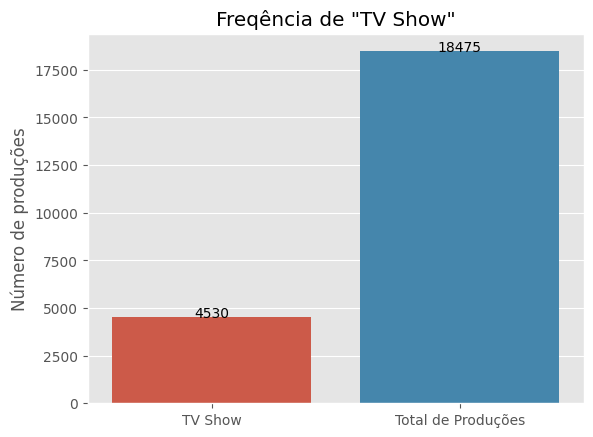

In [43]:
# Criando um gráfico com a frequência de TV Shows
chart_freq_tv_show = sns.barplot(data=freq_tv_show, x='type', y='count')
chart_freq_tv_show.set(xlabel=None, 
                       ylabel='Número de produções', 
                       title='Freqência de "TV Show"')

# Adicionando os valores de contagem acima de cada barra
for index, row in freq_tv_show.iterrows():
    chart_freq_tv_show.annotate(row['count'], xy=(index, row['count']), ha='center', fontsize=10)

plt.show(chart_freq_tv_show)

In [44]:
# Criando um novo DataFrame com a contagem de TV Shows e a contagem total
freq_tv_show = pd.DataFrame({'type': ['TV Show', 'Total de Produções'], 'count': [tv_show_count, titles.shape[0]]})

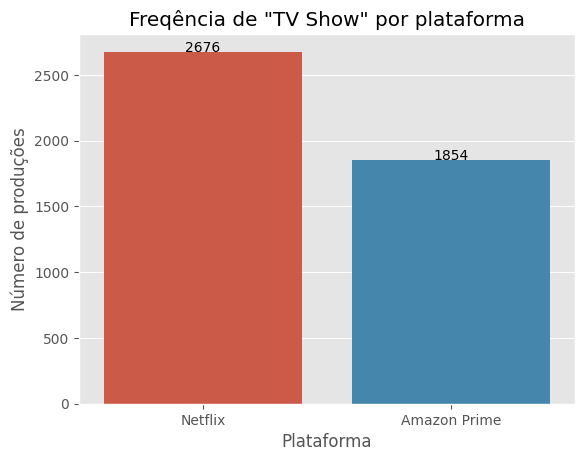

In [45]:
# Criando um gráfico com a frequência de TV Shows por plataforma
chart_freq_tv_show_by_platform = sns.countplot(data=titles.loc[titles.type == 'TV Show'], x='platform')
chart_freq_tv_show_by_platform.set(xlabel='Plataforma', 
                                   ylabel='Número de produções', 
                                   title='Freqência de "TV Show" por plataforma')

# Adicionando os valores de contagem acima de cada barra
df_freq_tv_show_platform = pd.DataFrame(titles.platform.loc[titles.type == 'TV Show'].value_counts().reset_index().rename(columns={'index': 'platform', 'platform': 'count'}))

for index, row in df_freq_tv_show_platform.iterrows():
    chart_freq_tv_show_by_platform.annotate(row['count'], xy=(index, row['count']), ha='center', fontsize=10)

plt.show(chart_freq_tv_show_by_platform)

#### 7- A frequência de "Movies" de todos os dados e comparativamente em relação as duas plataformas

In [46]:
# Calculando a frequência de Movie para todos os dados
movie_count = titles.loc[titles.type == 'Movie'].shape[0]

# Criando um novo DataFrame com a contagem de Movie e a contagem total
freq_movie = pd.DataFrame({'type': ['Movie', 'Total de Produções'], 'count': [movie_count, titles.shape[0]]})

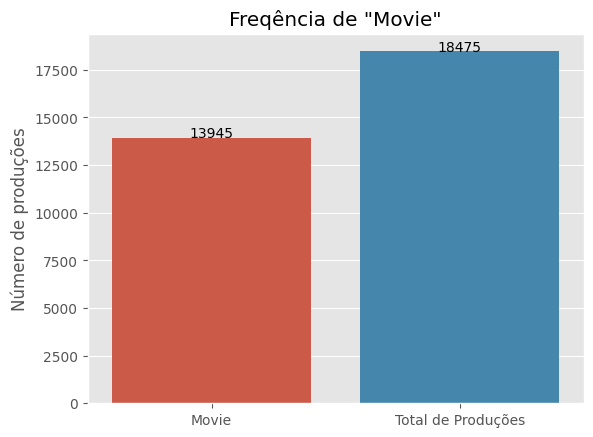

In [47]:
# Criando um gráfico com a frequência de Movie
chart_freq_movie = sns.barplot(data=freq_movie, x='type', y='count')
chart_freq_movie.set(xlabel=None, 
                     ylabel='Número de produções', 
                     title='Freqência de "Movie"')

# Adicionando os valores de contagem acima de cada barra
for index, row in freq_movie.iterrows():
    chart_freq_movie.annotate(row['count'], xy=(index, row['count']), ha='center', fontsize=10)

plt.show(chart_freq_movie)

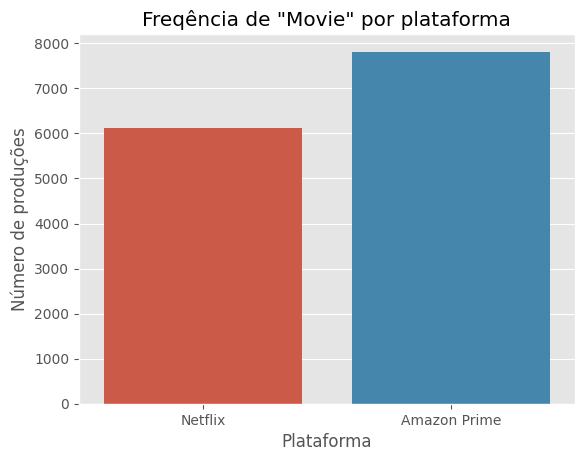

In [49]:
# Criando um gráfico com a frequência de Movie por plataforma
chart_freq_movie_by_platform = sns.countplot(data=titles.loc[titles.type == 'Movie'], x='platform')
chart_freq_movie_by_platform.set(xlabel='Plataforma', 
                                 ylabel='Número de produções', 
                                 title='Freqência de "Movie" por plataforma')

plt.show(chart_freq_movie_by_platform)

In [50]:
titles.platform.loc[titles.type == 'Movie'].value_counts()

Amazon Prime    7814
Netflix         6131
Name: platform, dtype: int64